In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json
from pathlib import Path

%matplotlib inline

nu = 0.02, uc = 2.500000e-02


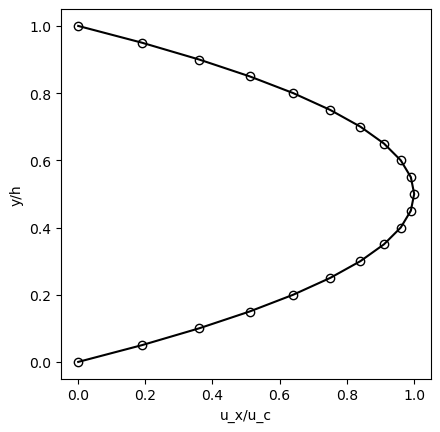

In [2]:
j = None
with open(Path('data/poiseuille.json'), mode='r') as f:
    j = json.load(f)

gx = j["externalForce"][0]
tau = j["relaxationTime"]
ny = j["gridShape"][1]
nu = (tau - 0.5) / 3.0
h = float((ny - 1))
uc = gx*h**2/(8.0*nu)
print(f"nu = {nu:.2f}, uc = {uc:.6e}")

ux = np.loadtxt(Path(j["outputDirectory"]) / Path("ux.txt"))
x = ux / uc

y = np.loadtxt(Path(j["outputDirectory"]) / Path("y.txt"))
y /= h

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, "-o", color="k", fillstyle="none")
ax.set_xlabel("u_x/u_c")
ax.set_ylabel("y/h")
ax.set_aspect('equal')

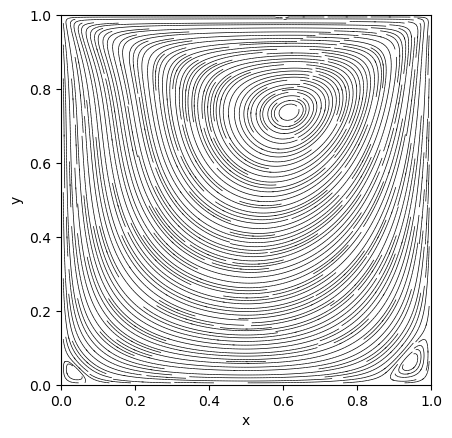

In [3]:
j = None
with open(Path('data/cavity.json'), mode='r') as f:
    j = json.load(f)

nx = j["gridShape"][0]
ny = j["gridShape"][1]
lx = float(nx - 2)
ly = float(ny - 2)

dir = Path(j["outputDirectory"])
ux = np.loadtxt(dir / Path("ux.txt"))
uy = np.loadtxt(dir / Path("uy.txt"))
x = np.loadtxt(dir / Path("x.txt")) / lx
y = np.loadtxt(dir / Path("y.txt")) / ly

fig = plt.figure()
ax = fig.add_subplot(111)
ax.streamplot(x, y, ux, uy, density=4, color="k", arrowstyle="-", linewidth=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xbound([0, 1])
ax.set_ybound([0, 1])
ax.set_aspect('equal')

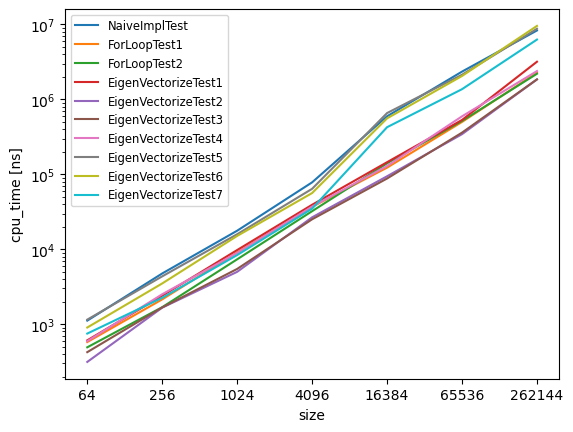

In [4]:
from pathlib import Path
import pandas as pd

path = Path("result/feq-benchmark-result.csv")
if path.exists():    
    df = pd.read_csv(path, skiprows=8)
    df2 = df["name"].str.split("/", expand=True)
    df2 = df2.rename(columns={0: 'fixture', 1:'test', 2:'size'})
    df3 = pd.concat([df2[['test', 'size']], df["cpu_time"]], axis=1)
    tests = df3["test"].unique()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    for test in tests:
        rows = df3["test"] == test
        ax.plot(df3.loc[rows, "size"], df.loc[rows, "cpu_time"], label=test)
    ax.set_ylabel("cpu_time [ns]")
    ax.set_xlabel("size")
    ax.set_yscale("log")
    ax.legend(fontsize="small")
    ax.set_aspect("equal")
    